In [1]:
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [67]:
news= pd.read_csv('data/abcnews-date-text.csv',nrows=10000)

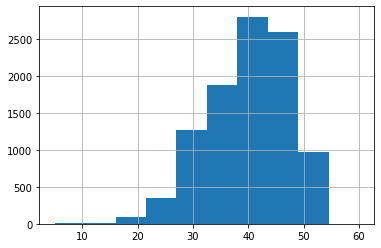

In [68]:
news['headline_text'].str.len().hist()

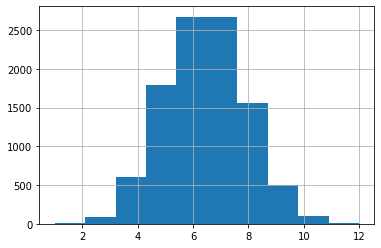

In [69]:
news['headline_text'].str.split().map(lambda x: len(x)).hist()

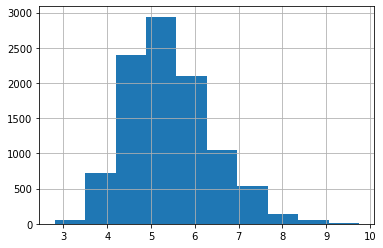

In [70]:
news['headline_text'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
#The average word length ranges between 3 to 9 with 5 being the most common length. 

In [71]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
#corpus containing stopwords The, a , and , ect

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
corpus = []
new = news['headline_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

from collections import defaultdict
dic =defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

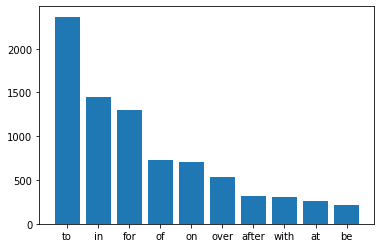

In [73]:
import matplotlib.pyplot as plt
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

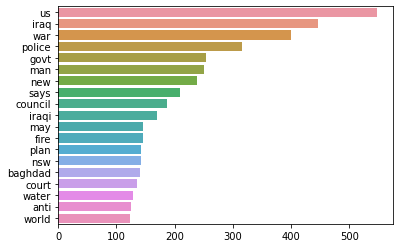

In [74]:
import seaborn as sns
from collections import  Counter
counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
sns.barplot (x = y, y = x)

In [75]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))
# any 'list' of words that are 

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

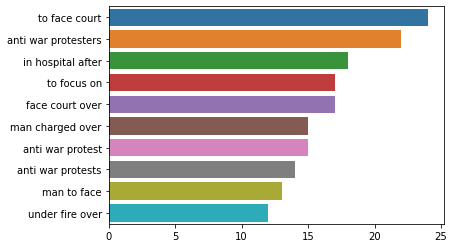

In [77]:
top_n_bigrams=get_top_ngram(news['headline_text'],3)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

Topic Modeling exploration with pyLDAvis

In [78]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [79]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
def preprocess_news(df):
    corpus2 = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for news in df['headline_text']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus2.append(words)
    return corpus2
corpus = preprocess_news(news)

In [80]:
# Now, let’s create the bag of words model using gensim
import pyLDAvis.gensim
import gensim
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [81]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.011*"war" + 0.007*"crash" + 0.007*"killed" + 0.007*"claim" + 0.007*"set" + 0.006*"council" + 0.006*"police" + 0.005*"car" + 0.005*"two" + 0.005*"dead"'),
 (1,
  '0.009*"new" + 0.008*"win" + 0.007*"iraqi" + 0.007*"man" + 0.007*"war" + 0.007*"world" + 0.006*"cup" + 0.006*"get" + 0.005*"back" + 0.005*"charged"'),
 (2,
  '0.021*"iraq" + 0.011*"police" + 0.009*"govt" + 0.008*"say" + 0.008*"fire" + 0.006*"water" + 0.005*"may" + 0.005*"council" + 0.005*"missing" + 0.005*"call"'),
 (3,
  '0.010*"war" + 0.007*"iraq" + 0.006*"north" + 0.006*"iraqi" + 0.006*"attack" + 0.006*"sars" + 0.005*"baghdad" + 0.005*"korea" + 0.005*"qld" + 0.004*"concern"')]

In [82]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.020959  0.146587       1        1  28.078327
1      0.103340  0.038421       2        1  24.474785
3      0.084503 -0.126390       3        1  23.816383
0     -0.166884 -0.058617       4        1  23.630501, topic_info=         Term        Freq       Total Category  logprob  loglift
43       iraq  430.000000  430.000000  Default  30.0000  30.0000
228     crash   90.000000   90.000000  Default  29.0000  29.0000
722       set   79.000000   79.000000  Default  28.0000  28.0000
627    killed   95.000000   95.000000  Default  27.0000  27.0000
282     north   76.000000   76.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
163     death   35.537315  115.202942   Topic4  -5.8264   0.2665
7209     sars   35.972305  128.863647   Topic4  -5.8142   0.1666
43       iraq   39.963047  430.637238   Topic4  -5.7090  -0.9347
8        fire   34.907837  155.109848   Topic4  -5.8443  -0.0488
3495  baghdad   34.644615  198.202087   Topic4  -5.8518  -0.3015

[283 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1084      4  0.982707  accident
3235      2  0.776046   advance
3235      4  0.217293   advance
50        1  0.832298       aid
50        3  0.153318       aid
...     ...       ...       ...
1352      1  0.064044      year
1352      2  0.352241      year
1352      3  0.576395      year
2652      3  0.972831       zim
440       1  0.958473  zimbabwe

[451 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

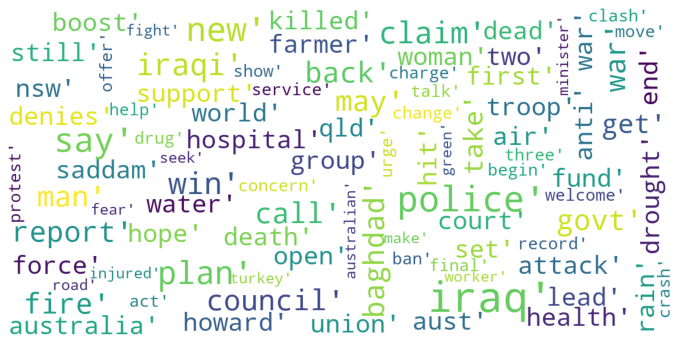

In [83]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) # stop words like and and at will be removed
#so that they do not populate the word cloud

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=90,
        max_font_size=25,
        scale=3,
        random_state=1)
    wordcloud = wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

# Sentiment analysis

In [84]:
from textblob import TextBlob
TextBlob("i love dogs").sentiment
# its is up to subjectivy 
#polarity: is a floating-point number that lies in the range of 
#[-1,1] where 1 means positive statement and -1 means a negative statement.

Sentiment(polarity=0.5, subjectivity=0.6)

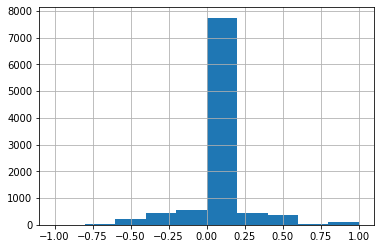

In [85]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

news['polarity_score'] = news['headline_text'].apply(lambda x : polarity(x))
news['polarity_score'].hist()
# This result shows majority of the news headlines are neutral

<BarContainer object of 3 artists>

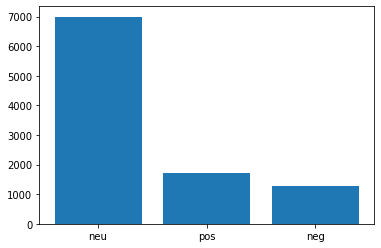

In [86]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'   
news['polarity'] = news['polarity_score'].map(lambda x: sentiment(x))
plt.bar(news.polarity.value_counts().index,
        news.polarity.value_counts())

In [87]:
news[news['polarity']=='pos']['headline_text'].head()

1     act fire witnesses must be aware of defamation
5                  ambitious olsson wins triple jump
6         antic delighted with record breaking barca
18        bryant leads lakers to double overtime win
26      commonwealth bank cuts fixed home loan rates
Name: headline_text, dtype: object

In [88]:
news[news['polarity']=='neg']['headline_text'].head()

7     aussie qualifier stosur wastes four memphis match
23               carews freak goal leaves roma in ruins
28     council chief executive fails to secure position
34                   dargo fire threat expected to rise
40        direct anger at govt not soldiers crean urges
Name: headline_text, dtype: object

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<BarContainer object of 3 artists>

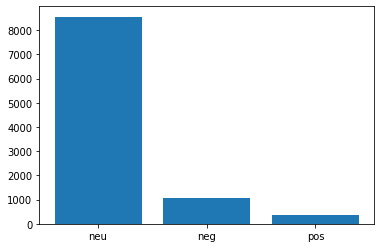

In [89]:
#Vader Sentiment Analysis is better for social media stuffs 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

news['polarity']=news['headline_text'].\
    map(lambda x: get_vader_score(x))
polarity=news['polarity'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())

# Named Entity Recognition

In [90]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [91]:
doc = nlp('India and Iran have agreed to boost the economic viability \
of the strategic Chabahar port through various measures, \
including larger subsidies to merchant shipping firms using the facility, \
people familiar with the development said on Thursday.')
[(x.text,x.label_) for x in doc.ents]

[('India', 'GPE'),
 ('Iran', 'GPE'),
 ('Chabahar', 'PERSON'),
 ('Thursday', 'DATE')]

In [92]:
from spacy import displacy
displacy.render(doc, style='ent')
# this is the best example, this is super powerfull

In [93]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=news['headline_text'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

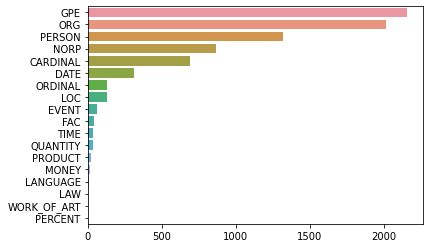

In [94]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

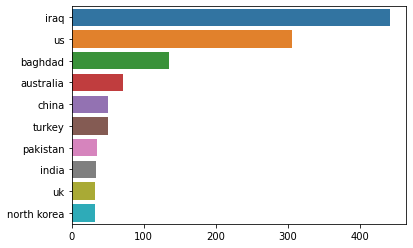

In [106]:
def ner(text,ent="GPE"):
    doc = nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe = news['headline_text'].apply(lambda x: ner(x))
gpe = [i for x in gpe for i in x]
counter = Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

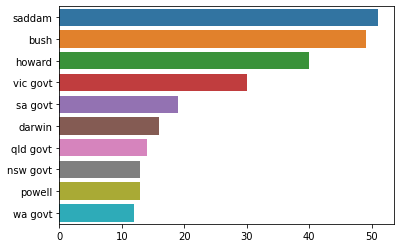

In [96]:
per=news['headline_text'].apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=Counter(per)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

Noun (NN)- Joseph, London, table, cat, teacher, pen, city
Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is
Adjective(JJ)- beautiful, happy, sad, young, fun, three
Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow
Preposition (IN)- at, on, in, from, with, near, between, about, under
Conjunction (CC)- and, or, but, because, so, yet, unless, since, if
Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this
Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!

# POS tagging

In [99]:
import nltk # probably done this allready
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [100]:
sentence="The greatest comeback stories in 2019"
tokens = word_tokenize(sentence)
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('greatest', 'JJS'),
 ('comeback', 'NN'),
 ('stories', 'NNS'),
 ('in', 'IN'),
 ('2019', 'CD')]

In [101]:
doc = nlp('The greatest comeback stories in 2019')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

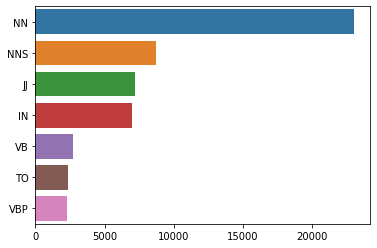

In [102]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=news['headline_text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

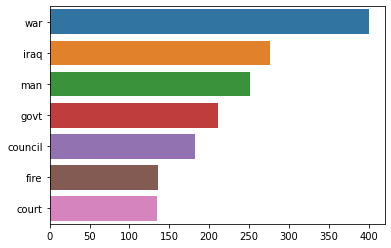

In [103]:
# which singular noun is most popular
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj

words=news['headline_text'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

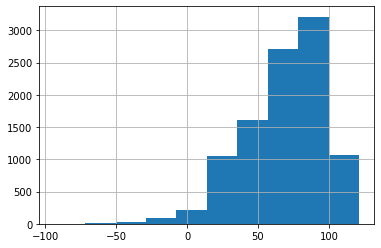

In [104]:
from textstat import flesch_reading_ease
news['headline_text'].apply(lambda x : flesch_reading_ease(x)).hist()
reading = news['headline_text'].apply(lambda x : flesch_reading_ease(x))

In [105]:
x = [i for i in range(len(reading)) if reading[i]<5]
news.iloc[x]['headline_text'].head()

134    policewomen accusations feature at federal crime
150      report highlights container terminal potential
285       groups praise outgoing opposition agriculture
298            investigations underway into qantas skid
308      landholder contribution still under discussion
Name: headline_text, dtype: object